In [1]:
import turicreate
image_train = turicreate.SFrame('data/image_train_data/')
image_test = turicreate.SFrame('data/image_test_data/')
def ShowFirstN(n,image_data):
    for i in range(0,n):
        image_data['image'][i].show()
def ShowAll(image_data):
    for i in range(0,image_data.num_rows()):
        image_data['image'][i].show()

In [2]:
image_test.head()

id,image,label,deep_features,image_array
0,Height: 32 Width: 32,cat,"[1.1346900463104248, 0.0,0.0, 0.0, ...","[158.0, 112.0, 49.0,159.0, 111.0, 47.0, ..."
6,Height: 32 Width: 32,automobile,"[0.2313588261604309, 0.0,0.0, 0.0, 0.0, ...","[160.0, 37.0, 13.0,185.0, 49.0, 11.0, 20 ..."
8,Height: 32 Width: 32,cat,"[0.0, 0.0,0.034419238567352295, ...","[23.0, 19.0, 23.0, 19.0,21.0, 28.0, 21.0, 16.0, ..."
9,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 11.6065092086792, ...","[217.0, 215.0, 209.0,210.0, 208.0, 202.0, ..."
12,Height: 32 Width: 32,dog,"[0.3223174810409546, 0.0,1.2493335008621216, 0.0, ...","[91.0, 64.0, 30.0, 82.0,58.0, 30.0, 87.0, 73.0, ..."
16,Height: 32 Width: 32,dog,"[0.0, 0.0,0.34735703468322754, ...","[95.0, 76.0, 78.0, 92.0,77.0, 78.0, 89.0, 77.0, ..."
24,Height: 32 Width: 32,dog,"[1.3155765533447266, 0.0,0.0, 0.0, 0.0, 0.0, ...","[136.0, 134.0, 118.0,142.0, 141.0, 126.0, ..."
25,Height: 32 Width: 32,bird,"[0.0,0.31728875637054443, ...","[100.0, 103.0, 74.0,68.0, 91.0, 65.0, 116.0, ..."
31,Height: 32 Width: 32,dog,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 9.260188102722168, ...","[127.0, 130.0, 81.0,130.0, 133.0, 88.0, ..."
33,Height: 32 Width: 32,dog,"[0.1307867169380188,0.7276672124862671, 0.0, ...","[118.0, 113.0, 81.0,122.0, 117.0, 83.0, ..."


In [3]:
sketch = turicreate.Sketch(image_train['label'])
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [4]:
dog_train_data = image_train[image_train['label'] == 'dog']
print(turicreate.Sketch(dog_train_data['label']))
cat_train_data = image_train[image_train['label'] == 'cat']
print(turicreate.Sketch(cat_train_data['label']))
automobile_train_data = image_train[image_train['label'] == 'automobile']
print(turicreate.Sketch(automobile_train_data['label']))
bird_train_data = image_train[image_train['label'] == 'bird']
print(turicreate.Sketch(bird_train_data['label']))


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  509  |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   1   |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+-------+
| value | count |
+-------+-------+
|  dog  |  509  |
+-------+-------+



+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  509  |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   1   |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+-------+
| value | count |
+-------+-------+
|  cat  |  509  |
+-------+-------+



+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  509  |   Yes    |
| # Missing Values |   0   |   Yes    |
| # uniqu

In [5]:
image_test_dog = image_test[image_test['label'] == 'dog']
print(turicreate.Sketch(image_test_dog['label']))
image_test_cat = image_test[image_test['label'] == 'cat']
image_test_automobile = image_test[image_test['label'] == 'automobile']
image_test_bird = image_test[image_test['label'] == 'bird']


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  1000 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   1   |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+-------+
| value | count |
+-------+-------+
|  dog  |  1000 |
+-------+-------+




In [6]:
knn_dog_model = turicreate.nearest_neighbors.create(dog_train_data,
                                               features = ['deep_features'],
                                               label = 'id')
knn_cat_model = turicreate.nearest_neighbors.create(cat_train_data,
                                               features = ['deep_features'],
                                               label = 'id')
knn_automobile_model = turicreate.nearest_neighbors.create(automobile_train_data,
                                               features = ['deep_features'],
                                               label = 'id')
knn_bird_model = turicreate.nearest_neighbors.create(bird_train_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [7]:
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')
def show_neighbors(i, model):
    return ShowAll(get_images_from_ids(model.query(image_train[i:i+1])))

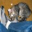

In [8]:
cat = image_test[0:1]
ShowAll(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 2.33ms       |

| Done         |         | 100         | 13.378ms     |

+--------------+---------+-------------+--------------+

36.15573070978294
+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |      16289      | 34.62371920804245  |  1   |
|      0      |      45646      | 36.00687992842462  |  2   |
|      0      |      32139      | 36.52008134363789  |  3   |
|      0      |      25713      | 36.754850252057054 |  4   |
|      0      |       331       | 36.87312281675268  |  5   |
+-------------+-----------------+--------------------+------+
[5 rows x 4 columns]



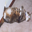

In [22]:
model = knn_cat_model
querry = model.query(cat)
print(querry['distance'].mean())
print(querry)
q=querry[0]
image_train[image_train['id']==q['reference_label']]['image'][0].show()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 2.629ms      |

| Done         |         | 100         | 13.784ms     |

+--------------+---------+-------------+--------------+

37.77071136184157
+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |      16976      | 37.464262878423774 |  1   |
|      0      |      13387      | 37.56668321685285  |  2   |
|      0      |      35867      | 37.60472670789396  |  3   |
|      0      |      44603      | 37.70655851529755  |  4   |
|      0      |       6094      | 38.511325490739715 |  5   |
+-------------+-----------------+--------------------+------+
[5 rows x 4 columns]



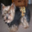

In [23]:
model = knn_dog_model
querry = model.query(cat)
print(querry['distance'].mean())
print(querry)
q=querry[0]
image_train[image_train['id']==q['reference_label']]['image'][0].show()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 2.469ms      |

| Done         |         | 100         | 13.987ms     |

+--------------+---------+-------------+--------------+

{'query_label': 0, 'reference_label': 49314, 'distance': 39.671058279212716, 'rank': 1}


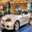

In [18]:
model = knn_automobile_model
q = model.query(cat)[0]
print(q)
image_train[image_train['id']==q['reference_label']]['image'][0].show()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 2       | 0.41841     | 2.341ms      |

| Done         |         | 100         | 12.414ms     |

+--------------+---------+-------------+--------------+

{'query_label': 0, 'reference_label': 49573, 'distance': 38.07426586900467, 'rank': 1}


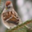

In [19]:
model = knn_bird_model
q = model.query(cat)[0]
print(q)
image_train[image_train['id']==q['reference_label']]['image'][0].show()

In [30]:
dog_dog_neighbors = knn_dog_model.query(image_test_dog, k=1)
dog_cat_neighbors = knn_cat_model.query(image_test_dog, k=1)
dog_automobile_neighbors = knn_automobile_model.query(image_test_dog, k=1)
dog_bird_neighbors = knn_bird_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 16

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 32000   | 6.28684     | 133.762ms    |

| Done         | 509000  | 100         | 167.606ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 16

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 31000   | 6.09037     | 130.429ms    |

| Done         | 509000  | 100         | 149.534ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 16

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 32000   | 6.28684     | 99.661ms     |

| Done         | 509000  | 100         | 130.014ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 16

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 30000   | 6.27615     | 100.892ms    |

| Done         | 478000  | 100         | 125.187ms    |

+--------------+---------+-------------+--------------+

In [31]:
dog_dog_neighbors.head()

query_label,reference_label,distance,rank
0,49803,33.47735903726335,1
1,5755,32.84584956840554,1
2,20715,35.03970731890584,1
3,13387,33.90103276968193,1
4,12089,37.484925090925636,1
5,6094,34.94516534398124,1
6,3431,39.095727834463545,1
7,6184,37.76961310322034,1
8,2167,35.10891446032838,1
9,7776,43.242283258453455,1


In [35]:
distances = turicreate.SFrame()
distances['dog-dog'] = dog_dog_neighbors['distance']
distances['dog-cat'] = dog_cat_neighbors['distance']
distances['dog-automobile'] = dog_automobile_neighbors['distance']
distances['dog-bird'] = dog_bird_neighbors['distance']
distances.head()

dog-dog,dog-cat,dog-automobile,dog-bird
33.47735903726335,36.419607706754384,41.95797614571203,41.75386473035126
32.84584956840554,38.83532688735542,46.00213318067788,41.3382958924861
35.03970731890584,36.97634108541546,42.946229069238804,38.615759085289056
33.90103276968193,34.575007291446106,41.68660600484793,37.08922699538214
37.484925090925636,34.77882479101661,39.22696649347584,38.27228869398105
34.94516534398124,35.11715782924591,40.58451176980721,39.146208923590486
39.095727834463545,40.60958309132649,45.10673529610854,40.523040105962316
37.76961310322034,39.90368673062214,41.32211409739762,38.19479183926956
35.10891446032838,38.067470016821176,41.82446549950164,40.156713166131446
43.242283258453455,42.72587329506032,45.497692940110376,45.55979626027668


In [40]:
def DogIsClosest(frame):
    if((frame['dog-dog']<frame['dog-cat'])&(frame['dog-dog']<frame['dog-automobile'])&(frame['dog-dog']<frame['dog-bird'])):
        return 1
    else:
        return 0

distances['Dog is closest to dog'] = distances.apply(DogIsClosest)
(distances['Dog is closest to dog'].sum())/len(distances['Dog is closest to dog'])

0.678

In [39]:
len(distances['Dog is closest to dog'])

1000